In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\malay\OneDrive\Dokumen\Sandu\dataset_med.csv")

In [3]:
df.head(5)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [4]:
df.drop(columns="id",inplace=True)

In [5]:
df["bmi"]=np.where(df["bmi"]<18.5,0,np.where((df["bmi"]>=18.5)&(df["bmi"]<=24.9),1,np.where((df["bmi"]>=25)&(df["bmi"]<=29.9),2,np.where(df["bmi"]>=30,3,df["bmi"]))))
#Under weight- 0
#Normal weight- 1
#Over weight- 2
#Obesity- 3

In [6]:
df["cholesterol_level"]=np.where(df["cholesterol_level"]<200,0,np.where((df["cholesterol_level"]>=200)&(df["cholesterol_level"]<=239),1,np.where(df["cholesterol_level"]>=240,2,df["cholesterol_level"])))
#Heart Healthy- 0
#AtRisk- 1
#Dangerous- 2

In [7]:
df['smoking_status'].value_counts()

smoking_status
Passive Smoker    223170
Never Smoked      222751
Former Smoker     222181
Current Smoker    221898
Name: count, dtype: int64

In [8]:
df['treatment_type'].value_counts()

treatment_type
Chemotherapy    223262
Surgery         223261
Combined        222609
Radiation       220868
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
ord=[['Stage I','Stage II','Stage III','Stage IV']]
oe=OrdinalEncoder(categories=ord)
df['cancer_stage']=oe.fit_transform(df[['cancer_stage']])

In [11]:
ord=[['Passive Smoker','Former Smoker','Never Smoked','Current Smoker']]
oe=OrdinalEncoder(categories=ord)
df['smoking_status']=oe.fit_transform(df[['smoking_status']])

In [12]:
ord=[['Chemotherapy','Surgery','Combined','Radiation']]
oe=OrdinalEncoder(categories=ord)
df['treatment_type']=oe.fit_transform(df[['treatment_type']])

In [13]:
ord=[['Male','Female']]
oe=OrdinalEncoder(categories=ord)
df['gender']=oe.fit_transform(df[['gender']])

In [14]:
ord=[['No','Yes']]
oe=OrdinalEncoder(categories=ord)
df['family_history']=oe.fit_transform(df[['family_history']])

In [15]:
df.head(5)

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,0.0,Sweden,2016-04-05,0.0,1.0,0.0,2.0,0,0,0,1,0,0.0,2017-09-10,0
1,50.0,1.0,Netherlands,2023-04-20,2.0,1.0,0.0,3.0,2,1,1,0,0,1.0,2024-06-17,1
2,65.0,1.0,Hungary,2023-04-05,2.0,1.0,1.0,3.0,2,1,1,0,0,2.0,2024-04-09,0
3,51.0,1.0,Belgium,2016-02-05,0.0,0.0,0.0,3.0,2,1,1,0,0,0.0,2017-04-23,0
4,37.0,0.0,Luxembourg,2023-11-29,0.0,0.0,0.0,1.0,0,0,0,0,0,2.0,2025-01-08,0


In [16]:
ord=[['Sweden', 'Netherlands', 'Hungary', 'Belgium', 'Luxembourg',
       'Italy', 'Croatia', 'Denmark', 'Malta', 'Germany', 'Poland',
       'Ireland', 'Romania', 'Spain', 'Greece', 'Estonia', 'Cyprus',
       'France', 'Slovenia', 'Latvia', 'Portugal', 'Austria',
       'Czech Republic', 'Finland', 'Lithuania', 'Slovakia', 'Bulgaria']]
oe=OrdinalEncoder(categories=ord)
df['country']=oe.fit_transform(df[['country']])

In [17]:
df['diagnosis_date']=pd.to_datetime(df['diagnosis_date'])
df['end_treatment_date']=pd.to_datetime(df['end_treatment_date'])

In [18]:
data=pd.DataFrame(df)
data.head(10)

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,0.0,0.0,2016-04-05,0.0,1.0,0.0,2.0,0,0,0,1,0,0.0,2017-09-10,0
1,50.0,1.0,1.0,2023-04-20,2.0,1.0,0.0,3.0,2,1,1,0,0,1.0,2024-06-17,1
2,65.0,1.0,2.0,2023-04-05,2.0,1.0,1.0,3.0,2,1,1,0,0,2.0,2024-04-09,0
3,51.0,1.0,3.0,2016-02-05,0.0,0.0,0.0,3.0,2,1,1,0,0,0.0,2017-04-23,0
4,37.0,0.0,4.0,2023-11-29,0.0,0.0,0.0,1.0,0,0,0,0,0,2.0,2025-01-08,0
5,50.0,0.0,5.0,2023-01-02,0.0,0.0,2.0,3.0,2,1,0,0,0,3.0,2024-12-27,0
6,49.0,1.0,6.0,2018-05-21,2.0,1.0,0.0,3.0,2,0,0,0,0,3.0,2019-05-06,1
7,51.0,0.0,7.0,2017-02-18,3.0,1.0,1.0,2.0,0,1,1,0,0,2.0,2017-08-26,0
8,64.0,0.0,0.0,2021-03-21,2.0,1.0,3.0,1.0,1,0,0,0,0,0.0,2022-03-07,0
9,56.0,0.0,2.0,2021-11-30,3.0,1.0,3.0,0.0,0,1,0,0,1,1.0,2023-11-29,0


In [19]:
((data['end_treatment_date'].dt.year-data['diagnosis_date'].dt.year)==0).value_counts()

False    835283
True      54717
Name: count, dtype: int64

In [20]:
timegap=data['end_treatment_date'].dt.year-data['diagnosis_date'].dt.year

In [21]:
data["end_treatment_age"]=np.where(timegap!=0,data["age"]+timegap,data["age"])

In [22]:
data["diagnosis_age"]=data["age"]

In [23]:
data["diagnosis_age"]=np.where(data["diagnosis_age"]<=18,0,np.where((data["diagnosis_age"]>=19)&(data["diagnosis_age"]<=64),1,np.where(data["diagnosis_age"]>=65,2,data["diagnosis_age"])))
#Young- 0
#Middle age- 1
#Senior- 2

In [24]:
data["end_treatment_age"]=np.where(data["end_treatment_age"]<=18,0,np.where((data["end_treatment_age"]>=19)&(data["end_treatment_age"]<=64),1,np.where(data["end_treatment_age"]>=65,2,data["end_treatment_age"])))

In [25]:
data.head(5)

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,end_treatment_age,diagnosis_age
0,64.0,0.0,0.0,2016-04-05,0.0,1.0,0.0,2.0,0,0,0,1,0,0.0,2017-09-10,0,2.0,1.0
1,50.0,1.0,1.0,2023-04-20,2.0,1.0,0.0,3.0,2,1,1,0,0,1.0,2024-06-17,1,1.0,1.0
2,65.0,1.0,2.0,2023-04-05,2.0,1.0,1.0,3.0,2,1,1,0,0,2.0,2024-04-09,0,2.0,2.0
3,51.0,1.0,3.0,2016-02-05,0.0,0.0,0.0,3.0,2,1,1,0,0,0.0,2017-04-23,0,1.0,1.0
4,37.0,0.0,4.0,2023-11-29,0.0,0.0,0.0,1.0,0,0,0,0,0,2.0,2025-01-08,0,1.0,1.0


In [26]:
data1=data.drop(columns=['diagnosis_date','end_treatment_date','age'])

In [27]:
data1.shape

(890000, 15)

In [28]:
pd.crosstab(data1["end_treatment_age"],data1["survived"])

survived,0,1
end_treatment_age,,
0.0,50,17
1.0,551861,155663
2.0,142085,40324


In [29]:
pd.crosstab(data1["diagnosis_age"],data1["survived"]).head(50)

survived,0,1
diagnosis_age,,
0.0,86,29
1.0,575416,162370
2.0,118494,33605


In [30]:
# Cancer Progression Risk Score
data1["cancer_risk_score"] = data1["cancer_stage"] * data1["smoking_status"] * data1["cholesterol_level"]
# Smoking-Cholesterol Interaction Index
data1["smoking_cholesterol_index"] = data1["smoking_status"] / (data1["cholesterol_level"] + 1)
# Cancer Stage & Smoking Severity Factor
data1["smoking_cancer_factor"] = data1["cancer_stage"] + (data1["smoking_status"] * 0.5)
# Metabolic Risk Factor
data1["metabolic_risk"] = (data1["cholesterol_level"] * data1["bmi"]) / (data1["cancer_stage"] + 1)
# Adjusted Survival Probability Indicator
data1["adjusted_survival_index"] = 1 / (data1["cancer_stage"] + data1["smoking_status"] + data1["cholesterol_level"] + 1)

In [31]:
data1.describe()

,gender,country,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived,end_treatment_age,diagnosis_age,cancer_risk_score,smoking_cholesterol_index,smoking_cancer_factor,metabolic_risk,adjusted_survival_index
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,0.499849,12.980030,1.500148,0.499797,1.498176,2.125426,1.251294,0.750024,0.469740,0.225956,0.088157,1.495599,0.220229,1.204879,1.170769,2.808121,0.819913,2.249237,1.747866,0.227023
std,0.500000,7.783649,1.118078,0.500000,1.118101,1.032310,0.849498,0.432999,0.499084,0.418211,0.283524,1.117151,0.414401,0.403800,0.376650,4.477197,0.806413,1.249630,1.924556,0.133839
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111
25%,0.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.142857
50%,0.000000,13.000000,2.000000,0.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.666667,2.000000,1.500000,0.200000
75%,1.000000,20.000000,3.000000,1.000000,2.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,4.000000,1.000000,3.000000,3.000000,0.250000
max,1.000000,26.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,18.000000,3.000000,4.500000,6.000000,1.000000


In [32]:
x=data1.drop(columns=['survived','cancer_stage','cholesterol_level','cancer_risk_score','smoking_cholesterol_index','smoking_status'])
y=data1['survived']

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV

In [34]:
from imblearn.over_sampling import SMOTE

In [35]:
sm=SMOTE(random_state=42)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [37]:
y_test.value_counts()

survived
0    138799
1     39201
Name: count, dtype: int64

In [38]:
x_resampled_smote,y_resampled_smote=sm.fit_resample(x_train,y_train)

In [39]:
x_resampled_smote.shape

(1110394, 14)

In [40]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x_resampled_smote,y_resampled_smote,test_size=0.2,random_state=42,stratify=y_resampled_smote)

In [41]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

# CatBoost Classifier

In [49]:
m1=CatBoostClassifier(task_type="GPU",iterations=310,learning_rate=0.066752,max_depth=16,score_function='NewtonCosine')
m1.fit(x1_train,y1_train,eval_set=(x1_test,y1_test))

0:	learn: 0.6532341	test: 0.6531832	best: 0.6531832 (0)	total: 859ms	remaining: 4m 25s
1:	learn: 0.6379281	test: 0.6379360	best: 0.6379360 (1)	total: 1.66s	remaining: 4m 15s
2:	learn: 0.6165388	test: 0.6165720	best: 0.6165720 (2)	total: 2.46s	remaining: 4m 12s
3:	learn: 0.6027101	test: 0.6027944	best: 0.6027944 (3)	total: 3.27s	remaining: 4m 10s
4:	learn: 0.5906900	test: 0.5909037	best: 0.5909037 (4)	total: 4.08s	remaining: 4m 8s
5:	learn: 0.5801183	test: 0.5802164	best: 0.5802164 (5)	total: 4.89s	remaining: 4m 7s
6:	learn: 0.5754268	test: 0.5755016	best: 0.5755016 (6)	total: 5.7s	remaining: 4m 6s
7:	learn: 0.5711337	test: 0.5712286	best: 0.5712286 (7)	total: 6.5s	remaining: 4m 5s
8:	learn: 0.5625239	test: 0.5624884	best: 0.5624884 (8)	total: 7.33s	remaining: 4m 5s
9:	learn: 0.5557314	test: 0.5557408	best: 0.5557408 (9)	total: 8.13s	remaining: 4m 3s
10:	learn: 0.5518118	test: 0.5519020	best: 0.5519020 (10)	total: 8.93s	remaining: 4m 2s
11:	learn: 0.5464328	test: 0.5464298	best: 0.54642

93:	learn: 0.4634257	test: 0.4684227	best: 0.4684227 (93)	total: 1m 15s	remaining: 2m 53s
94:	learn: 0.4631440	test: 0.4681964	best: 0.4681964 (94)	total: 1m 16s	remaining: 2m 53s
95:	learn: 0.4628797	test: 0.4680148	best: 0.4680148 (95)	total: 1m 17s	remaining: 2m 52s
96:	learn: 0.4623434	test: 0.4674581	best: 0.4674581 (96)	total: 1m 18s	remaining: 2m 51s
97:	learn: 0.4621367	test: 0.4673341	best: 0.4673341 (97)	total: 1m 18s	remaining: 2m 50s
98:	learn: 0.4619273	test: 0.4671903	best: 0.4671903 (98)	total: 1m 19s	remaining: 2m 49s
99:	learn: 0.4618289	test: 0.4671036	best: 0.4671036 (99)	total: 1m 20s	remaining: 2m 49s
100:	learn: 0.4614797	test: 0.4669998	best: 0.4669998 (100)	total: 1m 21s	remaining: 2m 48s
101:	learn: 0.4612934	test: 0.4668243	best: 0.4668243 (101)	total: 1m 22s	remaining: 2m 47s
102:	learn: 0.4610135	test: 0.4666229	best: 0.4666229 (102)	total: 1m 22s	remaining: 2m 46s
103:	learn: 0.4608659	test: 0.4664912	best: 0.4664912 (103)	total: 1m 23s	remaining: 2m 45s
10

183:	learn: 0.4448405	test: 0.4578793	best: 0.4578793 (183)	total: 2m 26s	remaining: 1m 40s
184:	learn: 0.4447041	test: 0.4577911	best: 0.4577911 (184)	total: 2m 27s	remaining: 1m 39s
185:	learn: 0.4445034	test: 0.4577480	best: 0.4577480 (185)	total: 2m 28s	remaining: 1m 38s
186:	learn: 0.4443729	test: 0.4577113	best: 0.4577113 (186)	total: 2m 29s	remaining: 1m 38s
187:	learn: 0.4441127	test: 0.4575317	best: 0.4575317 (187)	total: 2m 30s	remaining: 1m 37s
188:	learn: 0.4438662	test: 0.4573934	best: 0.4573934 (188)	total: 2m 30s	remaining: 1m 36s
189:	learn: 0.4437240	test: 0.4573266	best: 0.4573266 (189)	total: 2m 31s	remaining: 1m 35s
190:	learn: 0.4433632	test: 0.4572853	best: 0.4572853 (190)	total: 2m 32s	remaining: 1m 35s
191:	learn: 0.4432748	test: 0.4572432	best: 0.4572432 (191)	total: 2m 33s	remaining: 1m 34s
192:	learn: 0.4431964	test: 0.4572051	best: 0.4572051 (192)	total: 2m 34s	remaining: 1m 33s
193:	learn: 0.4430326	test: 0.4571535	best: 0.4571535 (193)	total: 2m 34s	remain

273:	learn: 0.4334415	test: 0.4523414	best: 0.4523414 (273)	total: 3m 38s	remaining: 28.7s
274:	learn: 0.4333771	test: 0.4522952	best: 0.4522952 (274)	total: 3m 39s	remaining: 27.9s
275:	learn: 0.4333020	test: 0.4522817	best: 0.4522817 (275)	total: 3m 40s	remaining: 27.1s
276:	learn: 0.4332277	test: 0.4522544	best: 0.4522544 (276)	total: 3m 41s	remaining: 26.3s
277:	learn: 0.4331371	test: 0.4522307	best: 0.4522307 (277)	total: 3m 41s	remaining: 25.5s
278:	learn: 0.4330048	test: 0.4521917	best: 0.4521917 (278)	total: 3m 42s	remaining: 24.7s
279:	learn: 0.4329193	test: 0.4521482	best: 0.4521482 (279)	total: 3m 43s	remaining: 23.9s
280:	learn: 0.4328250	test: 0.4520534	best: 0.4520534 (280)	total: 3m 44s	remaining: 23.1s
281:	learn: 0.4327446	test: 0.4520449	best: 0.4520449 (281)	total: 3m 45s	remaining: 22.3s
282:	learn: 0.4326380	test: 0.4519869	best: 0.4519869 (282)	total: 3m 45s	remaining: 21.5s
283:	learn: 0.4325342	test: 0.4519181	best: 0.4519181 (283)	total: 3m 46s	remaining: 20.7s

In [50]:
m1.score(x1_test,y1_test)

0.7653312559944885

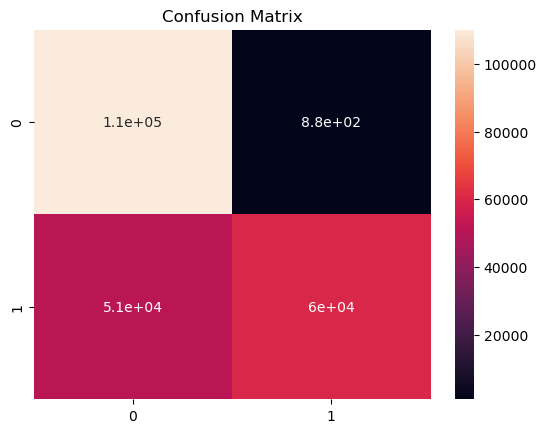

In [51]:
cf=confusion_matrix(y1_test,m1.predict(x1_test))
sns.heatmap(cf,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(accuracy_score(y1_test,m1.predict(x1_test)))
print(precision_score(y1_test,m1.predict(x1_test)))
print(recall_score(y1_test,m1.predict(x1_test)))

0.7653312559944885
0.985418657527927
0.5386305712407352


# XGBoost Classifier

In [42]:
pos_weight=sum(y1_train==0)/sum(y1_train==1)

In [43]:
m2=XGBClassifier(n_estimators=200,max_depth=30,min_child_weight=1,gamma=0.1,colsample_bytree=0.8,subsample=0.8,scale_pos_weight=pos_weight,tree_method='hist',device='cuda')

In [44]:
m2.fit(x1_train,y1_train)
m2.score(x1_test,y1_test)*100

C:\Users\malay\anaconda3\Lib\site-packages\xgboost\core.py:729: UserWarning: [08:00:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


77.06536863008209

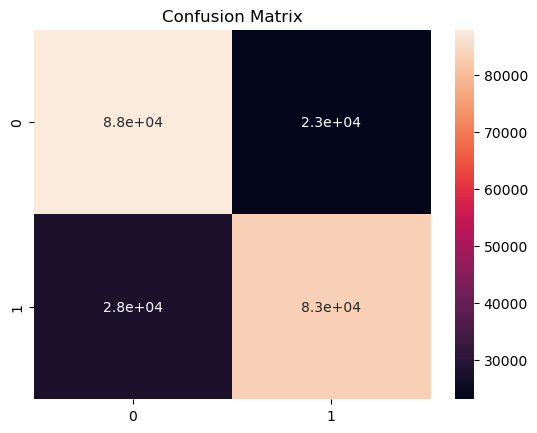

In [45]:
cf1=confusion_matrix(y1_test,m2.predict(x1_test))
sns.heatmap(cf1,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [46]:
print(accuracy_score(y1_test,m2.predict(x1_test)))
print(precision_score(y1_test,m2.predict(x1_test)))
print(recall_score(y1_test,m2.predict(x1_test)))

0.7706536863008209
0.7828304692352576
0.7491241815938544


In [65]:
from xgboost import plot_importance

<Figure size 1200x600 with 0 Axes>

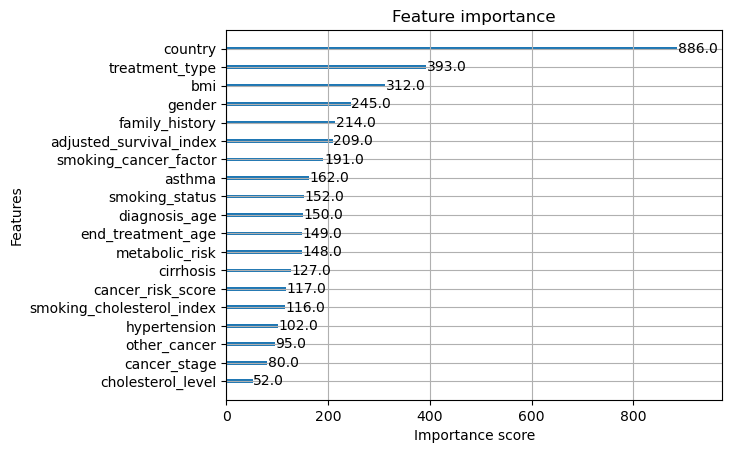

In [110]:
xgb_model = XGBClassifier()
xgb_model.fit(x1_train, y1_train)

plt.figure(figsize=(12,6))
plot_importance(xgb_model)
plt.show()

# Voting Classifier

In [70]:
from sklearn.ensemble import VotingClassifier

In [71]:
clf1=CatBoostClassifier(task_type="GPU",iterations=310,learning_rate=0.066752,max_depth=16,score_function='NewtonCosine')
clf2=XGBClassifier(n_estimators=200,max_depth=30,min_child_weight=1,gamma=0.1,colsample_bytree=0.8,subsample=0.8,scale_pos_weight=pos_weight,device='cuda')

In [72]:
par=[('catboost',clf1),('xgboost',clf2)]

In [73]:
vt=VotingClassifier(estimators=par,voting='soft',weights=[1,2])
vt.fit(x1_train,y1_train)

0:	learn: 0.6532340	total: 817ms	remaining: 4m 12s
1:	learn: 0.6379280	total: 1.62s	remaining: 4m 9s
2:	learn: 0.6165388	total: 2.44s	remaining: 4m 9s
3:	learn: 0.6027100	total: 3.24s	remaining: 4m 8s
4:	learn: 0.5906900	total: 4.05s	remaining: 4m 6s
5:	learn: 0.5801184	total: 4.86s	remaining: 4m 6s
6:	learn: 0.5754268	total: 5.67s	remaining: 4m 5s
7:	learn: 0.5711337	total: 6.47s	remaining: 4m 4s
8:	learn: 0.5625239	total: 7.28s	remaining: 4m 3s
9:	learn: 0.5557315	total: 8.08s	remaining: 4m 2s
10:	learn: 0.5518118	total: 8.89s	remaining: 4m 1s
11:	learn: 0.5464329	total: 9.7s	remaining: 4m
12:	learn: 0.5424376	total: 10.5s	remaining: 3m 59s
13:	learn: 0.5394508	total: 11.3s	remaining: 3m 58s
14:	learn: 0.5355432	total: 12.1s	remaining: 3m 58s
15:	learn: 0.5307602	total: 12.9s	remaining: 3m 57s
16:	learn: 0.5281303	total: 13.7s	remaining: 3m 56s
17:	learn: 0.5255168	total: 14.5s	remaining: 3m 55s
18:	learn: 0.5224433	total: 15.4s	remaining: 3m 55s
19:	learn: 0.5189124	total: 16.2s	rem

157:	learn: 0.4495461	total: 2m 7s	remaining: 2m 2s
158:	learn: 0.4493540	total: 2m 7s	remaining: 2m 1s
159:	learn: 0.4490758	total: 2m 8s	remaining: 2m
160:	learn: 0.4489968	total: 2m 9s	remaining: 1m 59s
161:	learn: 0.4488009	total: 2m 10s	remaining: 1m 58s
162:	learn: 0.4485456	total: 2m 11s	remaining: 1m 58s
163:	learn: 0.4482161	total: 2m 11s	remaining: 1m 57s
164:	learn: 0.4480384	total: 2m 12s	remaining: 1m 56s
165:	learn: 0.4476944	total: 2m 13s	remaining: 1m 55s
166:	learn: 0.4475357	total: 2m 14s	remaining: 1m 55s
167:	learn: 0.4473536	total: 2m 15s	remaining: 1m 54s
168:	learn: 0.4472509	total: 2m 15s	remaining: 1m 53s
169:	learn: 0.4471434	total: 2m 16s	remaining: 1m 52s
170:	learn: 0.4469850	total: 2m 17s	remaining: 1m 51s
171:	learn: 0.4468506	total: 2m 18s	remaining: 1m 50s
172:	learn: 0.4467341	total: 2m 19s	remaining: 1m 50s
173:	learn: 0.4466779	total: 2m 19s	remaining: 1m 48s
174:	learn: 0.4465639	total: 2m 19s	remaining: 1m 47s
175:	learn: 0.4463760	total: 2m 20s	re

VotingClassifier(estimators=[('catboost',
                              <catboost.core.CatBoostClassifier object at 0x00000294D80FDE50>),
                             ('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device='cuda',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_we...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=30,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft', weights=[1, 2])

In [74]:
print(accuracy_score(y1_test,vt.predict(x1_test)))
print(precision_score(y1_test,vt.predict(x1_test)))
print(recall_score(y1_test,vt.predict(x1_test)))

0.7785292621094295
0.8132564899877442
0.7230972901413018


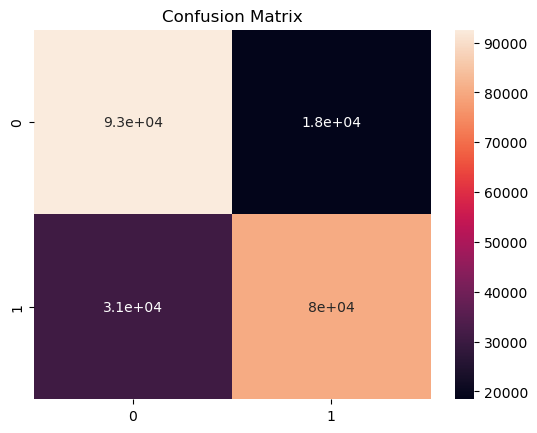

In [75]:
cf=confusion_matrix(y1_test,vt.predict(x1_test))
sns.heatmap(cf,annot=True)
plt.title("Confusion Matrix")
plt.show()

In [76]:
confusion_matrix(y1_test,vt.predict(x1_test))

array([[92603, 18437],
       [30747, 80292]], dtype=int64)